### Aykırı Gözlem
Veride genel eğilimin oldukça dışına çıkan ya da diğer gözlemlerden oldukça farklı olan gözlemlere Aykırı Gözlem denir.

Aykırı Değer: Aykırılığı ifade eden nümerik değere Aykırı Değer denir.

Aykırı Gözlem: Aykırı değeri barındıran gözlem birimine Aykırı Gözlem denir.

---

Aykırı Değer Neye Sebep Olur?

Aykırı Değer, **genellenebilirlik** kaygısı ile oluşturulan **kural setlerini** ya da fonksiyonları yanıltır. **Yanlılığa** sebep olur.

![aykiriGozlem](../images/veri_on_isleme/aykiri_gozlem.jpg)

### Kime Göre Neye Göre Aykırı?
Aykırı Gözlem'i, veride genel eğilimin oldukça dışına çıkan gözlemler olarak tanımlamıştık. Peki veri setinin  genel eğiliminin dışına çıkmayı nasıl tanımlarız?

1. Sektör Bilgisi

    Çalıştığımız ya da iyi bildiğimiz bir sektör hakkında genellemeye neyi alıp almayacağımızı çok iyi biliriz.
Örn. bir ev fiyat tahmin modelinde 1000 metrekarelik evleri modellemeye almamak. Çünkü evler genelde 1000 metrekarelikten azdır ve genelleme yapmak için evlerin metrekarelerini birbirine yakın değerler seçmeliyiz ki modelimiz sağlıklı çalışabilsin. 1000 metrekare çok uç bir değer olduğu için modelimizde yanlılıklara, yanlışlıklara yol açabilir.

> Eğer kurulan modelin bir genelleme kaygısı varsa; zaten çok seyrek olan senaryolar ve genele uymayan yapılar çalışmanın dışında bırakılmalıdır.

2. Standart Sapma Yaklaşımı

    Bir değişkenin ortalamasının üzerine aynı değişkenin standart sapması hesaplanarak eklenir. 1,2 ya da 3 standart sapma değeri ortalama üzerine eklenerek ortaya çıkan bu değer eşik değer olarak düşünülür ve bu değerden yukarıda ya da aşağıda olan değerler aykırı değer olarak tanımlanır.

*Eşik Değer = Ortalama + 1 x Standart Sapma*

*Eşik Değer = Ortalama + 2 x Standart Sapma*

*Eşik Değer = Ortalama + 3 x Standart Sapma*

3. Z-Skoru Yaklaşımı

    Standart sapma yöntemine benzer şekilde çalışır. Değişken standart normal dağılıma uyarlanır, yani standartlaştırılır. Sonrasında -örneğin- dağılımın sağından ve solundan -+ 2,5 değerine göre bir eşik değer konulur ve bu değerin üzerinde ya da altında olan değerler aykırı değer olarak işaretlenir.

    ![z_tablosu](../images/veri_on_isleme/z_tablosu.jpg)

4. Boxplot(interquartile range - IQR) Yöntemi

    En sık kullanılan yöntemlerden birisidir. Değişkenin değerleri küçükten büyüğe sıralanır. Çeyrekliklerine (yüzdekliklerine) yani Q1,Q3 değerlerine karşılık gelen değerler üzerinden bir eşik değer hesaplanır ve bu eşik değere göre aykırı değer tanımı yapılır.

    ![box_plot](../images/veri_on_isleme/box_plot.jpg)

### Aykırı Değerleri Yakalamak

In [2]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna() # Veri setindeki eksik değerleri siliyoruz
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

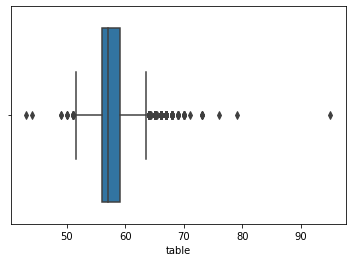

In [4]:
sns.boxplot(x = df_table);

### Eşik Değer Belirleyelim
Bir aykırı değeri tanımlayabilmek için öncelikle bir eşik değer belirlememiz gerekiyor. Burada Box Plot (Kutu Grafik) yöntemini kullanarak bir eşik değer belirleme işlemini beraber adım adım gerçekleştirelim. 

In [5]:
# quantile(0.25): Bu veri setinin %25lik daha doğrusu değişkenin küçükten büyüğe sıralandığında %25'inci index'ine karşılık gelen değeri alacak
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)

# IQR = Interquartile Range yani çeyrekler arası aralık 
IQR = Q3 - Q1 

print("Q1 değeri:", Q1)
print("Q3 değeri:", Q3)
print("IQR değeri:", IQR)

Q1 değeri: 56.0
Q3 değeri: 59.0
IQR değeri: 3.0


Evet şimdi alt ve üst sınırımızı belirleyebiliriz artık

In [6]:
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

print("Alt sınır:", alt_sinir)
print("Üst sınır:", ust_sinir)

Alt sınır: 51.5
Üst sınır: 63.5


In [7]:
# Aykırı Değer Sorgulaması Yapalım 
(df_table < alt_sinir) | (df_table > ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [11]:
aykiri_tf = df_table < alt_sinir

print("Alt sınırın altında kalan aykırı değerler:\n", df_table[aykiri_tf])

Alt sınırın altında kalan aykırı değerler:
 1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64


### Aykırı Değer Problemini Çözmek
Aykırı değerleri 3 farklı yolla imha edebiliriz. Bunlar;
1. Silme yöntemi
2. Ortalama ile doldurma yöntemi
3. Baskılama yöntemi

#### 1. Silme

In [12]:
import pandas as pd

type(df_table)

pandas.core.series.Series

In [13]:
df_table = pd.DataFrame(df_table)
df_table.shape 

(53940, 1)

In [14]:
# (~): tilda sembolü. Bunun amacı belirtilen koşulu sağlamayanları al demektir.
df_table[~((df_table < alt_sinir) | (df_table > ust_sinir)).any(axis= 1)]

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


#### 2. Ortalama ile Doldurma

In [17]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna() # Veri setindeki eksik değerleri siliyoruz
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [18]:
df_table = df["table"]
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

#### Yakalamış olduğumuz aykırı değerleri silmek yerine ortalama değer ile doldurmak istersek

In [19]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [20]:
df_table[aykiri_tf] = df_table.mean()
df_table[aykiri_tf]

C:\Users\HUSEY\AppData\Local\Temp\ipykernel_9128\1362949771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = df_table.mean()


1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

#### 3. Baskılama Yöntemi
Baskılama Yönteminde aykırılar yakalandıktan sonra üst taraftaysa üst sınır değerine eşitlenir, alt taraftaysa da alt sınır değerine eşitlenir. 

Veri setinin ortalaması ile maksimum değeri yani aykırı gözlemin gerçek değeri ile arasında çok ciddi bir fark varsa bu durumda örneğin 100 civarlarında olan bir değeri gelip 57 gibi bir değere atamış olduk. İşte bunun yerine 100 gibi bir değerin taşımış olduğu bilgiyi biraz törpülemiş olsak da sınırlara doğru baskılayarak onu yine taşıdığı bilgiyi özüne uygun bir şekilde veri setinin içinde tutabiliriz Baskılama yöntemi ile.

In [21]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna() # Veri setindeki eksik değerleri siliyoruz
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [23]:
df_table = df["table"]
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [25]:
df_table[aykiri_tf] = alt_sinir
df_table[aykiri_tf]

C:\Users\HUSEY\AppData\Local\Temp\ipykernel_9128\4037493889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = alt_sinir


1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

### Çok Değişkenli Aykırı Gözlem Analizi
#### Local Outlier Factor
Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

![lof](../images/veri_on_isleme/local_outlier_factor_intiution.png)

In [28]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
diamonds = df.select_dtypes(include = ['float64', 'int64'])
df = diamonds.copy()
df = df.dropna() # Veri setindeki eksik değerleri siliyoruz
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [30]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

Local Outlier Factor (LOF) fonksiyonunu kullanarak bir skorlama işlemi gerçekleştireceğiz.

In [31]:
# n_neighbors: Komşuluk sayısı
# contamination: Yoğunluğu ifade eder
clf = LocalOutlierFactor(n_neighbors= 20, contamination= 0.1)

# Şimdi bu clf nesnemiz, LOF'un biçimsel özelliklerini barındırıyor.
# fit_predict() ile hem eğitip hem de tahmin etmeyi bir arada yapacağız.
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [32]:
df_scores = clf.negative_outlier_factor_
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [36]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

Mesela yukarıdaki çıktıdan 13.değerin skoru bizim eşik değer skorumuz olsun. Bu skordan daha farklı olan, işte bu skorun aşağısında kalan değerleri Aykırı Değer olarak tanımlayacağız şimdi de.

In [38]:
esik_deger = np.sort(df_scores)[13]
aykiri_tf = df_scores > esik_deger
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [39]:
# Eşik değerin üzerinde olan bütün değerleri alalım. Bu, aykırı olmayan 
# değerlere erişmek anlamına geliyor. Bu aykırı değerleri silmek anlamına geliyor.
yeni_df = df[df_scores > esik_deger]
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [40]:
# Peki aykırı değerleri görmek istersek?
df[df_scores < esik_deger]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


### Baskılama

In [41]:
# Belirlemiş olduğumuz eşik değer
df[df_scores == esik_deger]

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [43]:
# Aykırı Gözlemlerin yerine bu eşik değerine karşılık gelen değerleri atayabiliriz
baski_deger = df[df_scores == esik_deger]
aykirilar = df[~aykiri_tf] # ='den sonra df[df_scores < esik_deger] ifadesi de yazsanız aynı anlama gelirdi

# İlk önce aykirilar dataframe'ini index'siz bir array'e çevireceğiz.
res = aykirilar.to_records(index= False)
res 

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [44]:
# Sonrasında bu res'in içerisindeki tüm değerleri baskı gözlemi ile arrayleştirip atama işlemini gerçekleştireceğiz.
res[:] = baski_deger.to_records(index= False)
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [45]:
# Son basamakta da aykırı değerleri baskı değeri ile değiştirmiş olacağız.
import pandas as pd

df[~aykiri_tf] = pd.DataFrame(res, index= df[~aykiri_tf].index)
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19
